In [0]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# data = pd.read_csv("/home/subhash/8th Sem/major project/dataset/KDDTrain+.csv")
# data_test = pd.read_csv("/home/subhash/8th Sem/major project/dataset/KDDTest+.csv")
data = pd.read_csv("/content/drive/My Drive/KDDTrain+.csv")
data_test = pd.read_csv("/content/drive/My Drive/KDDTest+.csv")

In [225]:
print(data.shape)
print(data_test.shape)

(125973, 42)
(22544, 42)


In [226]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [227]:
data_test.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')

In [228]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [229]:
data_test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [230]:
print(data['class'].value_counts())

normal     67343
anomaly    58630
Name: class, dtype: int64


In [231]:
for col_name in data.columns:
    if data[col_name].dtype == 'object':
        unique_cat = len(data[col_name].unique())
        print('Feature {col_name} has {unique_cat} categories'.format(col_name=col_name,unique_cat=unique_cat))

print('\nCategories in service\n')
print(data['service'].value_counts().head())

Feature protocol_type has 3 categories
Feature service has 70 categories
Feature flag has 11 categories
Feature class has 2 categories

Categories in service

http        40338
private     21853
domain_u     9043
smtp         7313
ftp_data     6860
Name: service, dtype: int64


In [232]:
for col_name in data_test.columns:
    if data_test[col_name].dtypes == 'object' :
        unique_cat = len(data_test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print('\nCategories in service\n')
print(data_test['service'].value_counts().head())

Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'class' has 2 categories

Categories in service

http       7853
private    4774
telnet     1626
pop_3      1019
smtp        934
Name: service, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


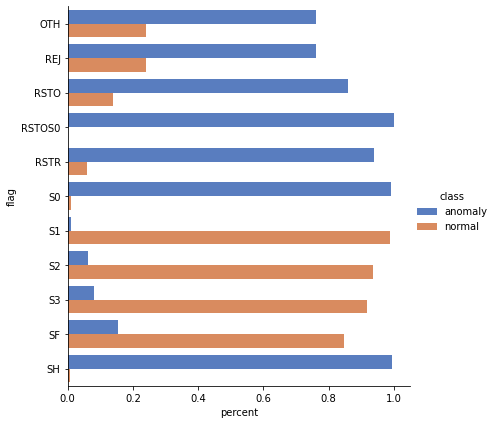

In [233]:
import seaborn as sns
flag_count = data[['flag', 'class']].groupby(['flag', 'class']).size()
flag_count_percent = flag_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
flag_count_percent.columns = ['flag', 'class', 'percent']
sns.factorplot(y="flag",
            x = 'percent',
            hue="class",
            data = flag_count_percent,
            size=6,
            kind="bar",
            palette="muted")

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


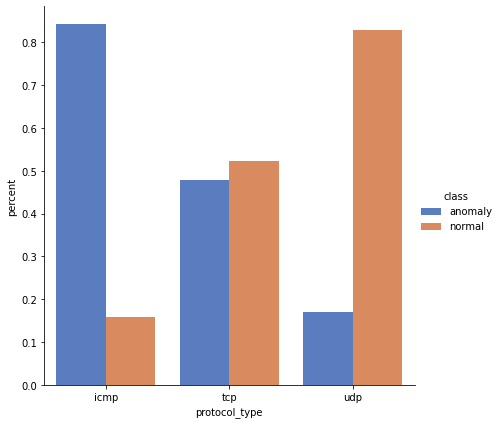

In [234]:
type_count = data[['protocol_type', 'class']].groupby(['protocol_type', 'class']).size()
type_count_percent = type_count.groupby(level=[0]).apply(lambda x: x / x.sum()).reset_index()
type_count_percent.columns = ['protocol_type', 'class', 'percent']
sns.factorplot(x="protocol_type",
            y = 'percent',
            hue="class",
            data = type_count_percent,
            size=6,
            kind="bar",
            palette="muted")

In [235]:
data.groupby('class').mean().T

class,anomaly,normal
duration,423.320689,168.587396
src_bytes,82820.141327,13133.279331
dst_bytes,37524.482159,4329.685223
land,0.000307,0.000104
wrong_fragment,0.048746,0.000000
urgent,0.000068,0.000148
hot,0.174262,0.230655
num_failed_logins,0.001040,0.001381
logged_in,0.034027,0.710646
num_compromised,0.017568,0.507076


1) Wrong fragments are present only in anomaly.

2) num_outboud_cmds are 0 for both anomaly and normal

3) connection duration is higher for anomaly

# LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [237]:
categorical_columns = ['protocol_type','service','flag']
data_categorical_values = data[categorical_columns]
testdata_categorical_values = data_test[categorical_columns]
data_categorical_values.head()

data_categorical_values_enc = data_categorical_values.apply(LabelEncoder().fit_transform)
testdata_categorical_values_enc = testdata_categorical_values.apply(LabelEncoder().fit_transform)
print(data_categorical_values_enc.head())
print(testdata_categorical_values_enc.head())

   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9
   protocol_type  service  flag
0              1       45     1
1              1       45     1
2              1       19     9
3              0       13     9
4              1       55     2


# OneHotEncoder

In [238]:
unique_protocol = sorted(data.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2 = [string1 + x for x in unique_protocol]

unique_service = sorted(data.service.unique())
string2 = 'service_'
unique_service2 = [string2 + x for x in unique_service]

unique_flag = sorted(data.flag.unique())
string3 = 'flag_'
unique_flag2 = [string3 + x for x in unique_flag]

dumcols = unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)

#test
unique_service_test=sorted(data_test.service.unique())
unique_service2_test=[ string2 + x for x in unique_service_test]
testdumcols=unique_protocol2 + unique_service2_test + unique_flag2
print('\n')
print(testdumcols)

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [239]:
enc = OneHotEncoder()
data_categorical_values_encenc = enc.fit_transform(data_categorical_values_enc)
data_cat_data = pd.DataFrame(data_categorical_values_encenc.toarray(),columns=dumcols)

testdata_categorical_values_encenc = enc.fit_transform(testdata_categorical_values_enc)
testdata_cat_data = pd.DataFrame(testdata_categorical_values_encenc.toarray(),columns=testdumcols)
data_cat_data.head()
#testdata_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,...,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [240]:
trainservice=data['service'].tolist()
testservice= data_test['service'].tolist()
difference = list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference

['service_aol',
 'service_urh_i',
 'service_http_8001',
 'service_harvest',
 'service_red_i',
 'service_http_2784']

In [0]:
data_cat_data = data_cat_data.sort_index(ascending=False, axis=1)

In [242]:
data_cat_data.head()

,service_whois,service_vmnet,service_uucp_path,service_uucp,service_urp_i,service_urh_i,service_time,service_tim_i,service_tftp_u,service_telnet,service_systat,service_supdup,service_sunrpc,service_ssh,service_sql_net,service_smtp,service_shell,service_rje,service_remote_job,service_red_i,service_private,service_printer,service_pop_3,service_pop_2,service_pm_dump,service_other,service_ntp_u,service_nntp,service_nnsp,service_netstat,service_netbios_ssn,service_netbios_ns,service_netbios_dgm,service_name,service_mtp,service_login,service_link,service_ldap,service_kshell,service_klogin,...,service_http_2784,service_http,service_hostnames,service_harvest,service_gopher,service_ftp_data,service_ftp,service_finger,service_exec,service_efs,service_ecr_i,service_eco_i,service_echo,service_domain_u,service_domain,service_discard,service_daytime,service_ctf,service_csnet_ns,service_courier,service_bgp,service_auth,service_aol,service_Z39_50,service_X11,service_IRC,flag_SH,flag_SF,flag_S3,flag_S2,flag_S1,flag_S0,flag_RSTR,flag_RSTOS0,flag_RSTO,flag_REJ,flag_OTH,Protocol_type_udp,Protocol_type_tcp,Protocol_type_icmp
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [243]:
for col in difference:
    testdata_cat_data[col] = 0

testdata_cat_data.shape

(22544, 84)

In [0]:
testdata_cat_data = testdata_cat_data.sort_index(ascending=False, axis=1)

In [245]:
testdata_cat_data.head()

,service_whois,service_vmnet,service_uucp_path,service_uucp,service_urp_i,service_urh_i,service_time,service_tim_i,service_tftp_u,service_telnet,service_systat,service_supdup,service_sunrpc,service_ssh,service_sql_net,service_smtp,service_shell,service_rje,service_remote_job,service_red_i,service_private,service_printer,service_pop_3,service_pop_2,service_pm_dump,service_other,service_ntp_u,service_nntp,service_nnsp,service_netstat,service_netbios_ssn,service_netbios_ns,service_netbios_dgm,service_name,service_mtp,service_login,service_link,service_ldap,service_kshell,service_klogin,...,service_http_2784,service_http,service_hostnames,service_harvest,service_gopher,service_ftp_data,service_ftp,service_finger,service_exec,service_efs,service_ecr_i,service_eco_i,service_echo,service_domain_u,service_domain,service_discard,service_daytime,service_ctf,service_csnet_ns,service_courier,service_bgp,service_auth,service_aol,service_Z39_50,service_X11,service_IRC,flag_SH,flag_SF,flag_S3,flag_S2,flag_S1,flag_S0,flag_RSTR,flag_RSTOS0,flag_RSTO,flag_REJ,flag_OTH,Protocol_type_udp,Protocol_type_tcp,Protocol_type_icmp
0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [246]:
newdata = data.join(data_cat_data)
newdata.drop('protocol_type',axis=1,inplace=True)
newdata.drop('service',axis=1,inplace=True)
newdata.drop('flag',axis=1,inplace=True)
print(newdata.shape)

newdata_test = data_test.join(testdata_cat_data)
newdata_test.drop('protocol_type',axis=1,inplace=True)
newdata_test.drop('service',axis=1,inplace=True)
newdata_test.drop('flag',axis=1,inplace=True)
print(newdata_test.shape)

(125973, 123)
(22544, 123)


In [0]:
X_data = newdata.drop("class",axis=1)
y_data = newdata["class"]

X_data_test = newdata_test.drop("class",axis=1)
y_data_test = newdata_test["class"]

In [0]:
colNames=list(X_data)
X_data = X_data[:].values

In [0]:
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler()
scaler_train.fit(X_data)
X_data = scaler_train.transform(X_data)

In [250]:
print(X_data.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [0]:
colNames_test=list(X_data_test)
X_data_test = X_data_test[:].values

In [0]:
scaler_test = StandardScaler()
scaler_test.fit(X_data_test)
X_data_test = scaler_test.transform(X_data_test)

In [253]:
print(X_data_test.std(axis=0))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1.]


In [0]:
# data_test = pd.DataFrame(data=X_data_test,columns=colNames_test)

In [0]:
# newdata_test = data_test.join(testdata_cat_data)

In [256]:
newdata.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,service_whois,...,service_http_2784,service_http,service_hostnames,service_harvest,service_gopher,service_ftp_data,service_ftp,service_finger,service_exec,service_efs,service_ecr_i,service_eco_i,service_echo,service_domain_u,service_domain,service_discard,service_daytime,service_ctf,service_csnet_ns,service_courier,service_bgp,service_auth,service_aol,service_Z39_50,service_X11,service_IRC,flag_SH,flag_SF,flag_S3,flag_S2,flag_S1,flag_S0,flag_RSTR,flag_RSTOS0,flag_RSTO,flag_REJ,flag_OTH,Protocol_type_udp,Protocol_type_tcp,Protocol_type_icmp
0,0,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [257]:
newdata_test.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class,service_whois,...,service_http_2784,service_http,service_hostnames,service_harvest,service_gopher,service_ftp_data,service_ftp,service_finger,service_exec,service_efs,service_ecr_i,service_eco_i,service_echo,service_domain_u,service_domain,service_discard,service_daytime,service_ctf,service_csnet_ns,service_courier,service_bgp,service_auth,service_aol,service_Z39_50,service_X11,service_IRC,flag_SH,flag_SF,flag_S3,flag_S2,flag_S1,flag_S0,flag_RSTR,flag_RSTOS0,flag_RSTO,flag_REJ,flag_OTH,Protocol_type_udp,Protocol_type_tcp,Protocol_type_icmp
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229,10,0.0,0.00,1.0,1.0,0.04,0.06,0.00,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,136,1,0.0,0.00,1.0,1.0,0.01,0.06,0.00,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,2,12983,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.00,0.0,0.0,1.00,0.00,0.00,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,0.0,...,0,0.0,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0,20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,65,0.0,0.00,0.0,0.0,1.00,0.00,1.00,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1,0,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,0.0,0.12,1.0,0.5,1.00,0.00,0.75,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly,0.0,...,0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [0]:
classdf = y_data
newclassdf = classdf.replace({'normal': 0 , 'anomaly' : 1})
y_data = newclassdf

In [259]:
y_data

0         0
1         0
2         1
3         0
4         0
         ..
125968    1
125969    0
125970    0
125971    1
125972    0
Name: class, Length: 125973, dtype: int64

In [0]:
classdf = y_data_test
newclassdf = classdf.replace({'normal': 0 , 'anomaly' : 1})
y_data_test = newclassdf

In [261]:
y_data_test

0        1
1        1
2        0
3        1
4        1
        ..
22539    0
22540    0
22541    1
22542    0
22543    1
Name: class, Length: 22544, dtype: int64

In [0]:
import numpy as np
y_data = np.array(y_data)

In [0]:
y_data_test = np.array(y_data_test)

In [264]:
y_data_test

array([1, 1, 0, ..., 1, 0, 1])

# Feature Scaling

# Feature Selection

## ANOVA F-TEST

In [0]:
# from sklearn.feature_selection import SelectPercentile, f_classif
# import numpy as np

In [0]:
# np.seterr(divide='ignore', invalid='ignore')

In [0]:
# selector=SelectPercentile(f_classif, percentile=10)
# X_newdata = selector.fit_transform(X_data,y_data)
# X_newdata.shape

In [0]:
# true=selector.get_support()
# newcolindex_data=[i for i, x in enumerate(true) if x]
# newcolname_data=list(colNames[i] for i in newcolindex_data)
# newcolname_data

In [0]:
# print(X_newdata.shape)

In [0]:
# print(X_newdata.std(axis=0))

In [0]:
# X_data_test = X_data_test[newcolname_data]
# X_data_test = pd.DataFrame(data=X_data_test,columns=colNames_test)

In [0]:
# X_data_test = X_data_test[newcolname_data]

In [0]:
# X_data_test.columns

In [0]:
# X_data_test = X_data_test[:].values

In [0]:
# X_data_test.shape

In [0]:
# print(X_data_test.std(axis=0))

In [265]:
print(X_data.shape)
print(X_data_test.shape)
print(y_data.shape)
print(y_data_test.shape)

(125973, 122)
(22544, 122)
(125973,)
(22544,)


In [266]:
print(type(X_data))
print(type(X_data_test))
print(type(y_data))
print(type(y_data_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


# Building Model

In [0]:
X_train = np.reshape(X_data, (X_data.shape[0], 1, X_data.shape[1]))
X_test = np.reshape(X_data_test, (X_data_test.shape[0], 1, X_data_test.shape[1]))

In [0]:
import numpy as np
y_train = np.array(y_data)
y_test = np.array(y_data_test)

In [269]:
batch_size = 32
print(X_train.shape)
print(X_test.shape)

(125973, 1, 122)
(22544, 1, 122)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import SimpleRNN,GRU,LSTM

In [294]:
model = Sequential()
model.add(LSTM(60,input_dim=122, return_sequences=True))
model.add(Dropout(0.6))
model.add(LSTM(60, return_sequences=False))
model.add(Dropout(0.6))
model.add(Dense(1))
model.add(Activation('sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(60, return_sequences=True, input_shape=(None, 122...)`
  


In [0]:
from keras.optimizers import SGD
kd = SGD(learning_rate=0.4)

In [296]:
model.compile(loss='binary_crossentropy',optimizer=kd,metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=batch_size, epochs=1000, validation_data=(X_test, y_test))

Train on 125973 samples, validate on 22544 samples
Epoch 1/10
125973/125973 [==============================] - 13s 106us/step - loss: 0.0661 - accuracy: 0.9782 - val_loss: 1.0611 - val_accuracy: 0.8120
Epoch 2/10
125973/125973 [==============================] - 12s 99us/step - loss: 0.0327 - accuracy: 0.9881 - val_loss: 1.0967 - val_accuracy: 0.8137
Epoch 3/10
125973/125973 [==============================] - 12s 98us/step - loss: 0.0298 - accuracy: 0.9894 - val_loss: 1.1211 - val_accuracy: 0.8134
Epoch 4/10
125973/125973 [==============================] - 12s 98us/step - loss: 0.0266 - accuracy: 0.9904 - val_loss: 1.1304 - val_accuracy: 0.8149
Epoch 5/10
125973/125973 [==============================] - 12s 99us/step - loss: 0.0248 - accuracy: 0.9908 - val_loss: 1.1135 - val_accuracy: 0.8145
Epoch 6/10
125973/125973 [==============================] - 13s 99us/step - loss: 0.0238 - accuracy: 0.9914 - val_loss: 1.1161 - val_accuracy: 0.8129
Epoch 7/10
125973/125973 [======================

In [297]:
loss, accuracy = model.evaluate(X_test, y_test)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

22544/22544 [==============================] - 1s 31us/step

Loss: 1.12, Accuracy: 81.56%


In [0]:
# from sklearn.svm import SVC

In [0]:
# clf = SVC(kernel="rbf")

In [0]:
# clf.fit(X_data,y_data)

In [0]:
# y_pred = clf.predict(X_data_test)

In [0]:
# from sklearn.metrics import accuracy_score

In [0]:
# print("Accuracy Score: ",accuracy_score(y_data_test,y_pred))

In [0]:
# from sklearn.tree import DecisionTreeClassifier

In [0]:
# clftree = DecisionTreeClassifier()

In [220]:
# clftree.fit(X_data,y_data)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
# y_predtree = clftree.predict(X_data_test)

In [209]:
# print("Accuracy Score: ",clftree.score(X_data_test,y_data_test))

Accuracy Score:  0.8535752306600426


In [215]:
# from sklearn.metrics import confusion_matrix
# confusion_matrix(y_data_test, y_predtree)

array([[ 6807,  2904],
       [  397, 12436]])

In [0]:
# X_data = pd.DataFrame(data=X_data)
# y_data = pd.DataFrame(data=y_data)
# X_data_test = pd.DataFrame(data=X_data_test)
# y_data_test = pd.DataFrame(data=y_data_test)

In [170]:
# from sklearn.model_selection import KFold
# from sklearn.metrics import confusion_matrix
# cv = KFold(n_splits=5)

# tree_model = DecisionTreeClassifier(max_depth=3)
# fold_accuracy = []
# for train_index, valid_index in cv.split(X_data):
#     train_x,test_x = X_data.iloc[train_index],X_data.iloc[valid_index]
#     train_y,test_y= y_data.iloc[train_index], y_data.iloc[valid_index]

#     model = tree_model.fit(train_x,train_y)
#     valid_acc = model.score(test_x,test_y)
#     fold_accuracy.append(valid_acc)

# print("Accuracy per fold: ", fold_accuracy, "\n")
# print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Accuracy per fold:  [0.9747172057948006, 0.9749156578686248, 0.9749156578686248, 0.9743192823688179, 0.9743986663491307] 

Average accuracy:  0.9746532940499998
